# Imports

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [3]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import LdaModel, HdpModel

In [4]:
import spacy
import nltk
from nltk.corpus import stopwords

# Creación de Stop Words

In [5]:
nltk.download("stopwords")
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across'])
st1= ['after', 'afterwards','again','against', 'all', 'almost','alone','along','already','also','although','always','am','among','amongst','amoungst','amount','an','and','another','any',
      'anyhow','anyone','anything','anyway','anywhere','are','around','as','at','back','be','became','because','become','becomes','becoming','been','before','beforehand','behind','being',
      'below','beside','besides','between','beyond','bill','both','bottom','but','by','call','can','cannot','cant','co','con','could','couldnt','cry','de','describe','detail','do','done',
      'down','due','during','each','eg','eight','either','eleven','else','elsewhere','empty','enough','etc','even','ever','every','everyone','everything','everywhere','except','few','fifteen',
      'fifty','fill','find','fire','first','five','for','former','formerly','forty','found','four','from','front','full','further','get','give','go','had','has','hasnt','have','he','hence',
      'her','here','hereafter','hereby','herein','hereupon','hers','herself','him','himself','his','how','however','hundred','i','ie','if','in','inc','indeed','interest','into','is','it',
      'its','itself','keep','last','latter','latterly','least','less','ltd','made','many','may','me','meanwhile','might','mill','mine','more','moreover','most','mostly','move','much','must',
      'my','myself','name','namely','neither','never','nevertheless','next','nine','no','nobody','none','noone','nor','not','nothing','now','nowhere','of','off','often','on','once','one',
      'only','onto','or','other','others','otherwise','our','ours','ourselves','out','over','own','part','per','perhaps','please','put','rather','re','same','see','seem','seemed','seeming',
      'seems','serious','several','she','should','show','side','since','sincere','six','sixty','so','some','somehow','someone','something','sometime','sometimes','somewhere','still','such',
      'system','take','ten','than','that','the','their','them','themselves','then','thence','there','thereafter','thereby','therefore','therein','thereupon','these','they','thick','thin',
      'third','this','those','though','three','through','throughout','thru','thus','to','together','too','top','toward','towards','twelve','twenty','two','un','under','until','up','upon',
      'us','very','via','was','we','well','were','what','whatever','when','whence','whenever','where','whereafter','whereas','whereby','wherein','whereupon','wherever','whether','which',
      'while','whither','who','whoever','whole','whom','whose','why','will','with','within','without','would','yet','you','your','yours','yourself','yourselves']
stop_words.extend(st1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isanavarro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Lectura de Datos

Introducir nombre .csv descargado de scrapping.ipynb

In [6]:
user_input = input('Introducir .csv : ')

Introducir .csv : JoeBiden_TW.csv


Descomentear de acuerdo a la red social que se utilizara

In [7]:
#Reddit
#df = pd.read_csv(user_input)
#df = df.drop(['Unnamed: 0'],axis=1)

#Twitter
df = pd.read_csv(user_input,lineterminator='\n')
df = df.drop(['Unnamed: 0','Tweet','Date of creation'],axis=1)

#Youtube
#df = pd.read_csv(user_input)
#df = df.drop(['Unnamed: 0','user_id','likes','rank','source'],axis=1)

# Limpieza de datos

In [8]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [9]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = remove_emojis(sent)    # remove emojis
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)

In [10]:
# Convertir a Lista
data = df.Filtered.values.tolist()
data_words = list(sent_to_words(data))
print(data_words)

[['democrats', 'are', 'working', 'tirelessly', 'to', 'open', 'doors', 'for', 'more', 'outstanding', 'entrepreneurs', 'but', 'the', 'republican', 'plan', 'led', 'by', 'senator', 'would', 'tax', 'half', 'of', 'our', 'small', 'business', 'owners', 'an', 'extra', 'year', 'on', 'average'], ['american', 'workers', 'are', 'beginning', 'to', 'rebuild', 'our', 'nation', 'roads', 'bridges', 'ports', 'and', 'waterways', 'the', 'bipartisan', 'infrastructure', 'law', 'will', 'create', 'new', 'jobs', 'modernize', 'communities', 'across', 'the', 'country', 'and', 'open', 'infrastructure', 'jobs', 'to', 'people', 'of', 'all', 'backgrounds'], ['this', 'is', 'not', 'your', 'father', 'republican', 'party', 'https', 'co', 'truwtisdx'], ['ensuring', 'worker', 'safety', 'is', 'national', 'priority', 'and', 'moral', 'imperative', 'on', 'workers', 'memorial', 'day', 'we', 'honor', 'and', 'remember', 'those', 'who', 'lost', 'their', 'lives', 'on', 'the', 'job', 'and', 'reaffirm', 'every', 'worker', 'basic', 'r

# Construccion de los modelos de bigrama y trigrama

In [11]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_sm")
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)

# Creación de modelo HDP

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build HDP model
hdp_model = gensim.models.hdpmodel.HdpModel(corpus=corpus,
                                         id2word=id2word,)

pprint(hdp_model.print_topics())

[(0,
  '0.010*seek + 0.009*vital + 0.009*soon + 0.009*news + 0.008*historic + '
  '0.007*kind + 0.007*share + 0.006*conquest + 0.006*track + 0.006*decrease'),
 (1,
  '0.017*act + 0.009*cost + 0.007*bj + 0.007*grow + 0.007*force + '
  '0.006*healthy + 0.006*ramp + 0.006*raise + 0.006*demonstrate + 0.006*awake'),
 (2,
  '0.010*sign + 0.009*joy + 0.007*half + 0.007*national + 0.007*screening + '
  '0.007*innovation + 0.007*commitment + 0.006*tonight + 0.006*equitable + '
  '0.005*watch'),
 (3,
  '0.011*candidate + 0.010*resilient + 0.009*mask + 0.008*rescue + '
  '0.008*hardworke + 0.008*soul + 0.008*sure + 0.007*dictate + 0.007*affect + '
  '0.007*major'),
 (4,
  '0.012*workplace + 0.010*security + 0.008*start + 0.007*credential + '
  '0.007*test + 0.007*sure + 0.006*pen + 0.006*brutal + 0.005*rest + '
  '0.005*nation'),
 (5,
  '0.010*fuel + 0.010*determination + 0.008*importantly + 0.007*usher + '
  '0.007*reach + 0.007*young + 0.006*strengthen + 0.006*care + 0.006*lead + '
  '0.006*cou

# Visualización de resultados

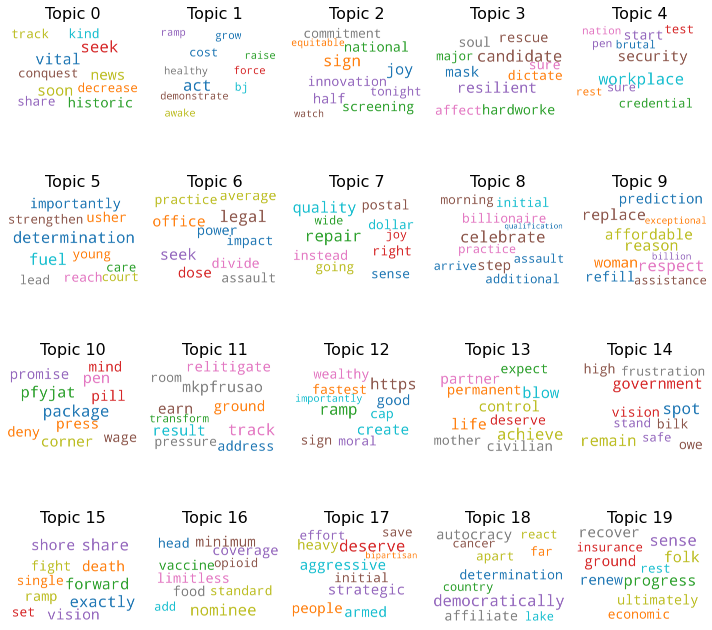

In [13]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  #color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = hdp_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/Users/isanavarro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


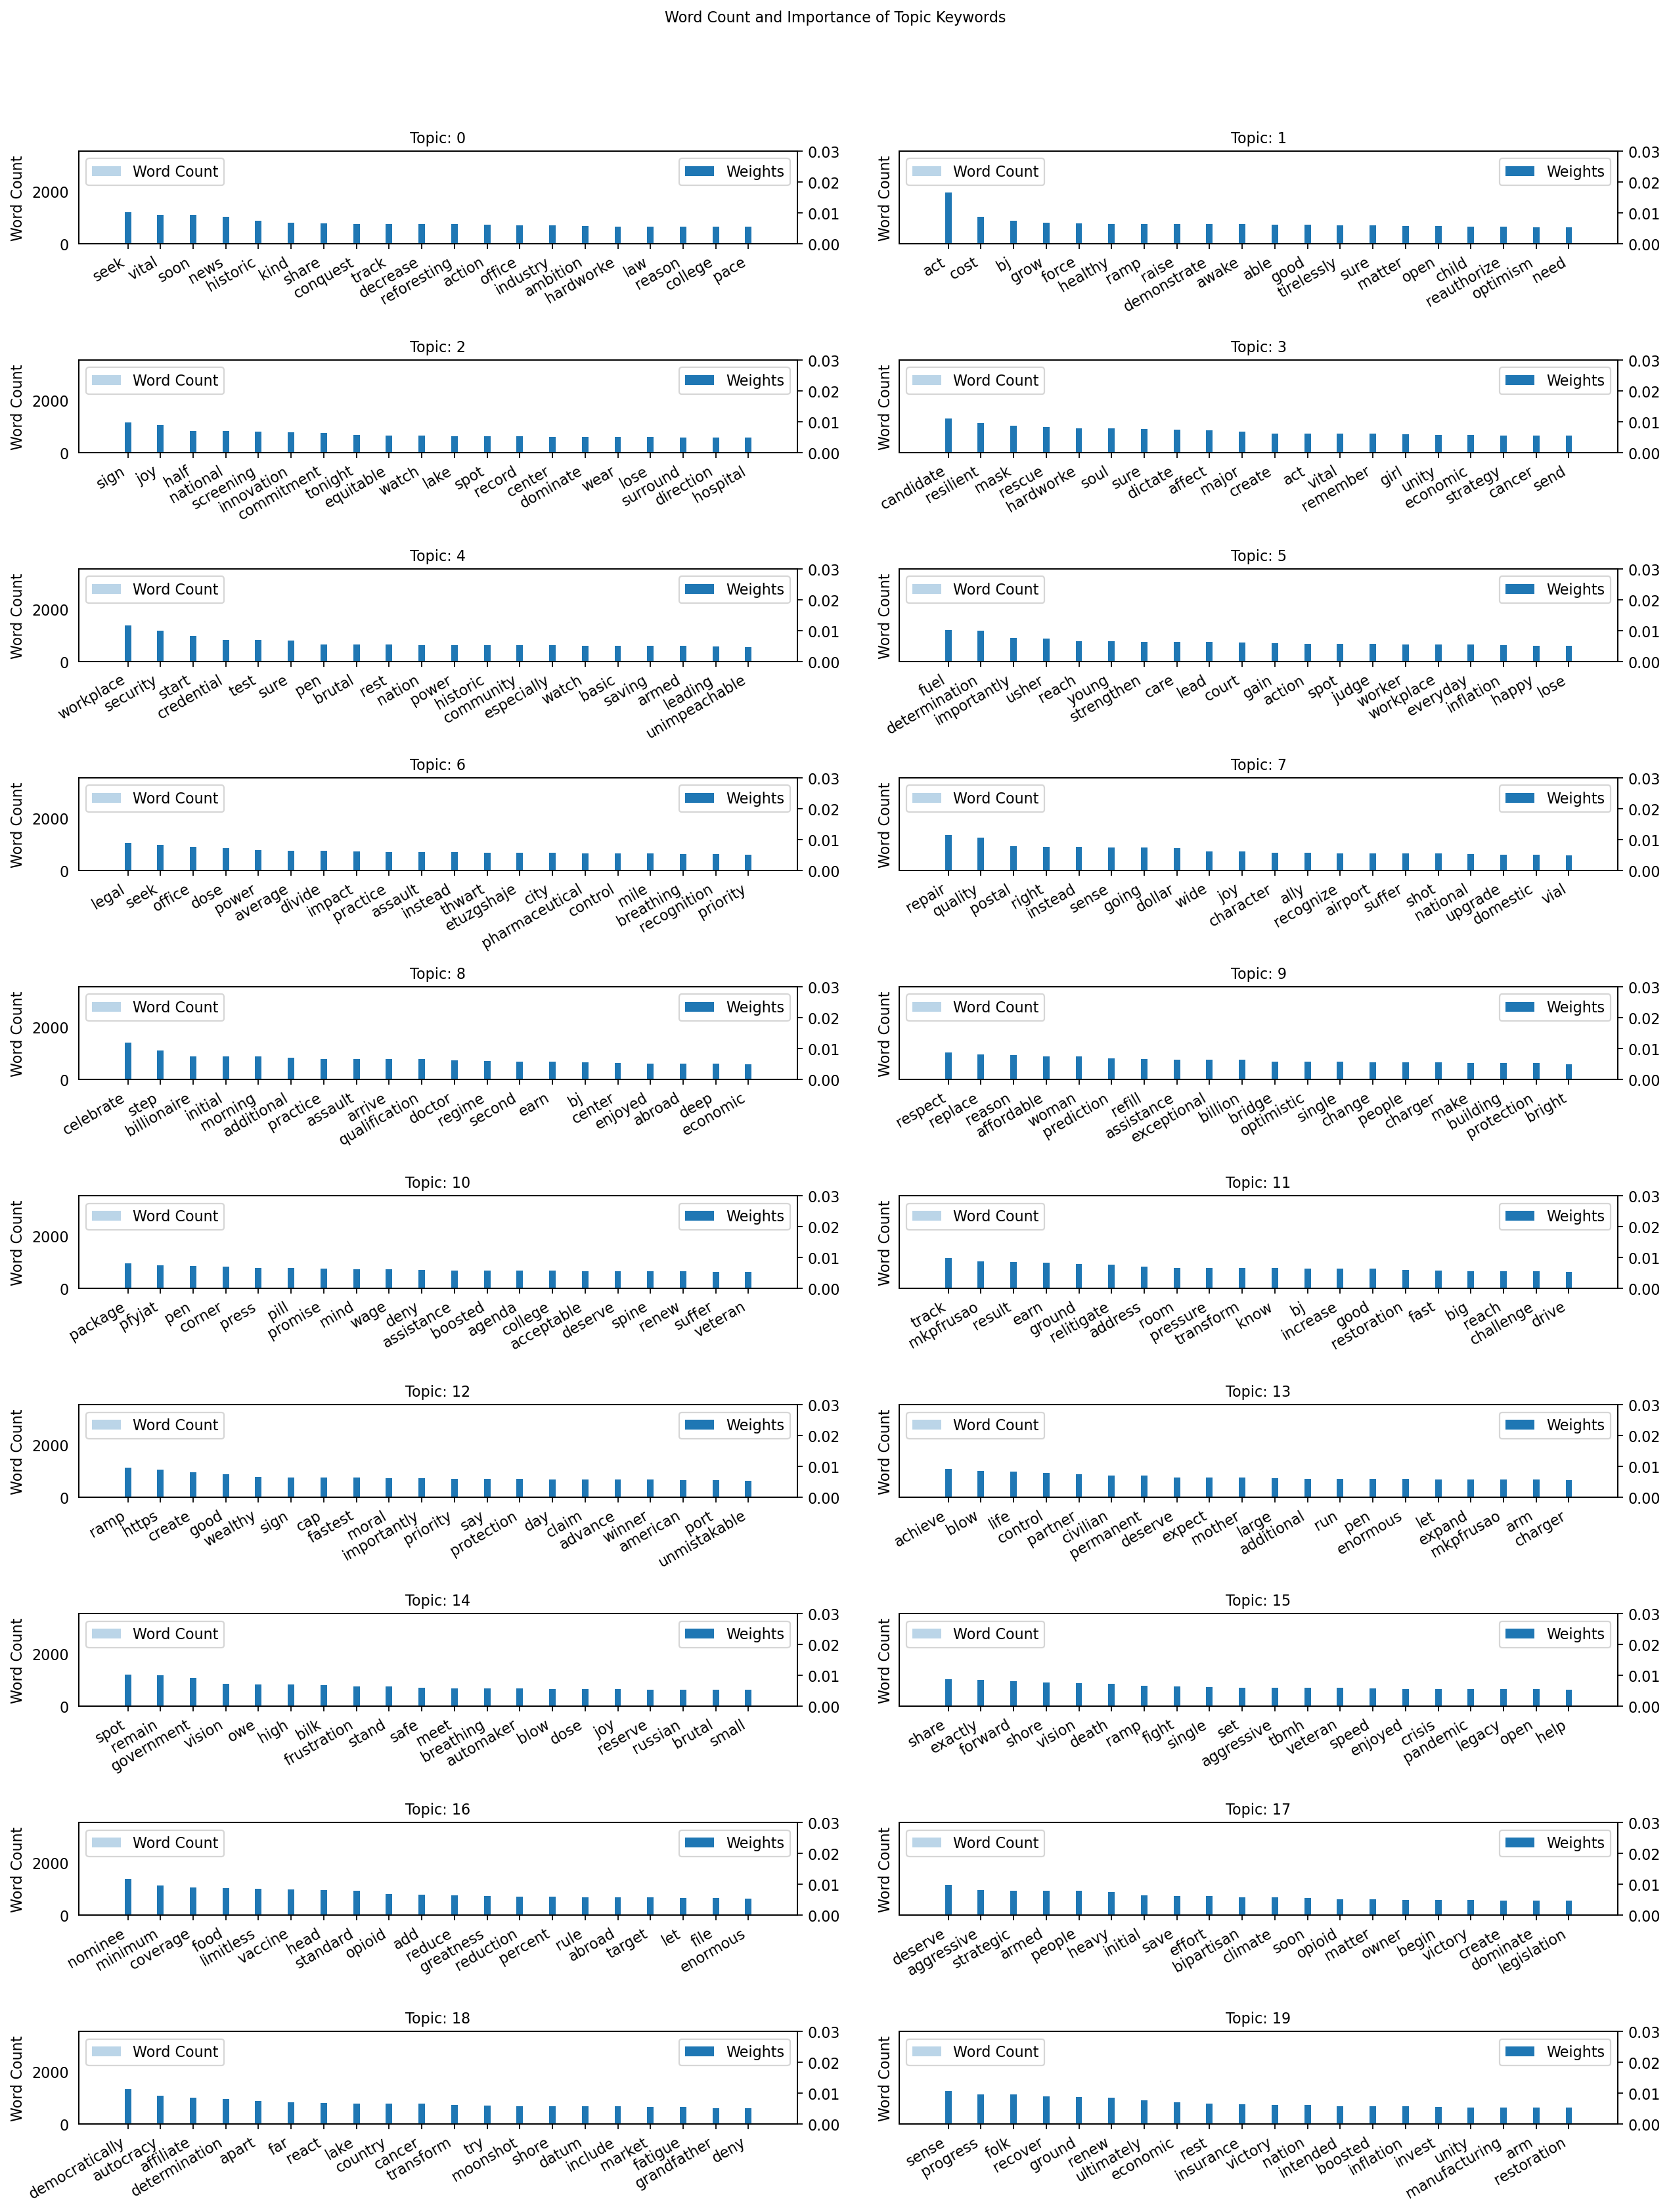

In [14]:
from collections import Counter
topics = hdp_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(10, 2, figsize=(16,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], width=1, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], width=0.2, label='Weights')
    ax.set_ylabel('Word Count')
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), fontsize=10)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=10, y=1.05)    
plt.show()